In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Sales_Analysis.csv')


In [7]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [8]:
df.shape

(186850, 6)

In [9]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [11]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(618)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape


(185687, 6)

Now the Data has been cleaned lets get into the part of Answering data analysis questions

Q1Converting the text based categorical column to numerical columns

In [18]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [19]:
df['Order ID']=pd.to_numeric(df['Order ID'],errors='coerce')
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each']=pd.to_numeric(df['Price Each'],errors='coerce')
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\3594586219.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')


In [20]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


In [22]:
df.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Q2 Convert the order date into the Day,month,year and time column seprately

In [25]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"


In [26]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['day'] = df['Order Date'].dt.day
df['time'] = df['Order Date'].dt.time

Q3 change the column type of order id and quantity ordered to int

In [27]:
df['Order ID'] = df['Order ID'].astype('int')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')


In [28]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00


Q4 Create a new column and store the PIN Codes from the adress column

In [29]:
df['Pin Codes'] = df['Purchase Address'].str[-5:]

In [30]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001


Q5 Create a new column city and store the city names from the address column

In [31]:
df['Purchase Address'].head(1)

0    917 1st St, Dallas, TX 75001
Name: Purchase Address, dtype: object

In [32]:
df1 = df['Purchase Address'].str.split(',',n=3,expand=True)
df1.columns =['Street','City','Zip']
df1


,Street,City,Zip
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
4,669 Spruce St,Los Angeles,CA 90001
5,333 8th St,Los Angeles,CA 90001
...,...,...,...
186845,840 Highland St,Los Angeles,CA 90001
186846,216 Dogwood St,San Francisco,CA 94016
186847,220 12th St,San Francisco,CA 94016
186848,511 Forest St,San Francisco,CA 94016


In [33]:
df = pd.concat([df,df1['City']],axis=1)
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,02215,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles


Q6 Create a category column according to the product columns

In [34]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [40]:

patterns = {
    'Phones': r'Phone',
    'Accessories': r'Cable|Headphones|Batteries',
    'Monitors': r'Monitor',
    'Laptop': r'Laptop',
    'TV': r'TV'
}

# Function to categorize product based on pattern
def categorize_product(product):
    for category, pattern in patterns.items():  # ✅ use .items()
        if pd.notnull(product) and pd.Series(product).str.contains(pattern, case=False, regex=True).any():
            return category
    return 'Other'  # default category

df['Category'] = df['Product'].apply(categorize_product)


In [41]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,75001,Dallas,Accessories
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,02215,Boston,Phones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles,Phones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles,Phones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,90001,Los Angeles,Phones


Q7 Create 12 Seprate date ordered dataframes for evry month

In [42]:
df['Order_Month'] = df['Order Date'].dt.month

In [43]:
january_df   = df[df['Order_Month'] == 1].sort_values(by='Order Date')
february_df  = df[df['Order_Month'] == 2].sort_values(by='Order Date')
march_df     = df[df['Order_Month'] == 3].sort_values(by='Order Date')
april_df     = df[df['Order_Month'] == 4].sort_values(by='Order Date')
may_df       = df[df['Order_Month'] == 5].sort_values(by='Order Date')
june_df      = df[df['Order_Month'] == 6].sort_values(by='Order Date')
july_df      = df[df['Order_Month'] == 7].sort_values(by='Order Date')
august_df    = df[df['Order_Month'] == 8].sort_values(by='Order Date')
september_df = df[df['Order_Month'] == 9].sort_values(by='Order Date')
october_df   = df[df['Order_Month'] == 10].sort_values(by='Order Date')
november_df  = df[df['Order_Month'] == 11].sort_values(by='Order Date')
december_df  = df[df['Order_Month'] == 12].sort_values(by='Order Date')


In [45]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category,Order_Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,75001,Dallas,Accessories,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,02215,Boston,Phones,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles,Phones,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles,Phones,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,90001,Los Angeles,Phones,4


Analysing The data set


best month for sales, how much we earn that month, Explain via graph

In [48]:
df['Sales'] = df['Quantity Ordered'] *  df['Price Each']

In [50]:
best_month = df.groupby('Order_Month')[['Sales']].sum()
best_month

,Sales
Order_Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


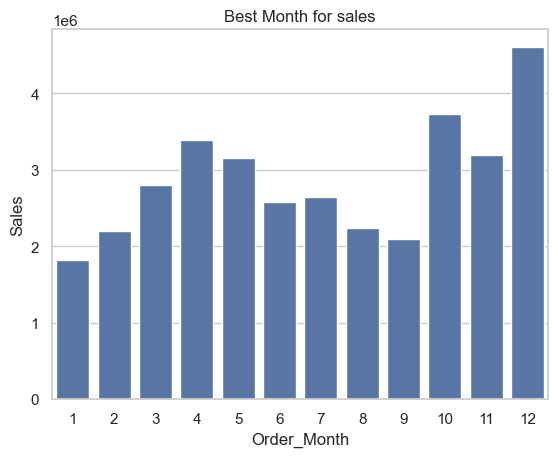

In [54]:
sns.barplot(x=best_month.index,y=best_month['Sales'])
plt.title('Best Month for sales')
plt.show()

C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\3486101991.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\3486101991.py:21: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


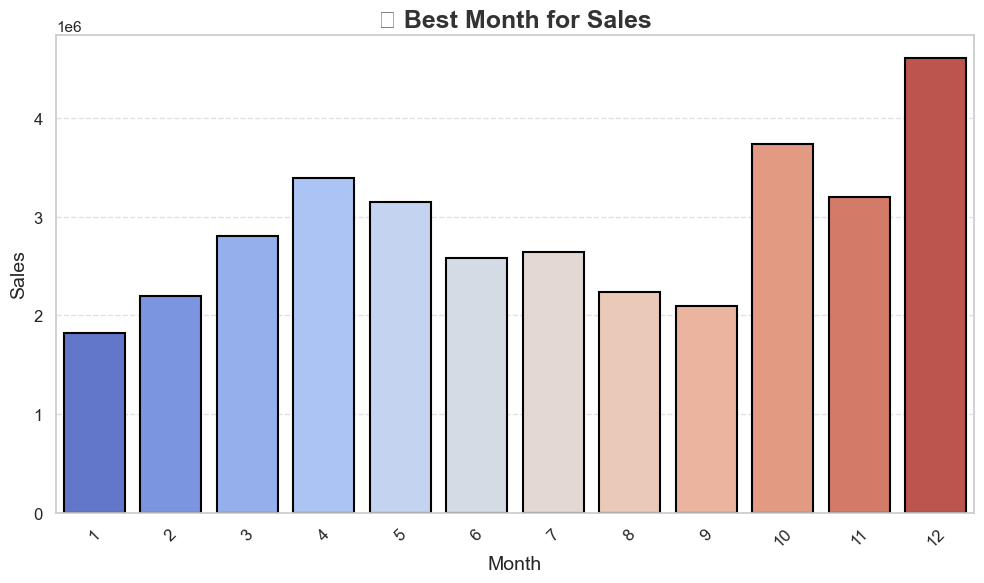

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

# vibrant color palette
colors = sns.color_palette("coolwarm", len(best_month))

sns.barplot(
    x=best_month.index,
    y=best_month['Sales'],
    palette=colors,
    edgecolor="black",
    linewidth=1.5
)

plt.title('Best Month for Sales', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Which City Sold The Most Product

In [55]:
city_prod = df['City'].value_counts()
city_prod

City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\1353809795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\1353809795.py:22: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\1353809795.py:22: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) 

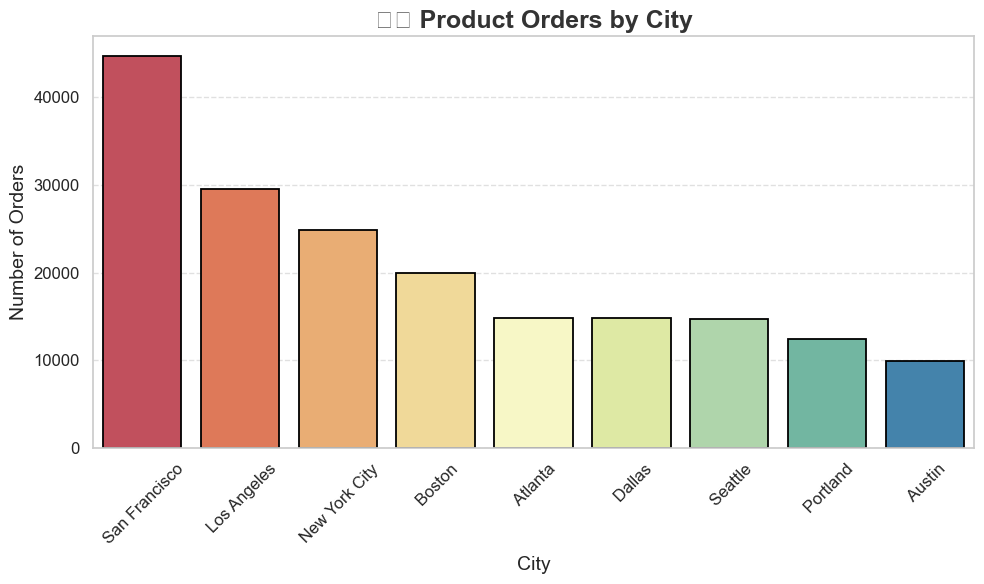

In [56]:
# Create the plot
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

# vibrant colors for each city
colors = sns.color_palette("Spectral", len(city_prod))

sns.barplot(
    x=city_prod.index,
    y=city_prod.values,
    palette=colors,
    edgecolor="black",
    linewidth=1.3
)

plt.title('🏙️ Product Orders by City', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

What Time we should display the advertisement to maximise likeihood of customer buying product

In [60]:
df['Order Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category,Order_Month,Sales,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,75001,Dallas,Accessories,4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,02215,Boston,Phones,4,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles,Phones,4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,90001,Los Angeles,Phones,4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,90001,Los Angeles,Phones,4,11.99,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,90001,Los Angeles,Accessories,9,8.97,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,94016,San Francisco,Phones,9,700.00,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,94016,San Francisco,Phones,9,700.00,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,94016,San Francisco,Monitors,9,379.99,17


In [ ]:
# # this returns series not a data frame
# temp_hour= df['Order Hour'].value_counts().sort_index()
# temp_hour

Order Hour
0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
Name: count, dtype: int64

In [ ]:
# retunrs a data frame
hourly_orders = pd.DataFrame(df.groupby(['Order Hour']).size())
hourly_orders

,0
Order Hour,
0,3902
1,2347
2,1242
3,830
4,852
5,1320
6,2481
7,4002
8,6252


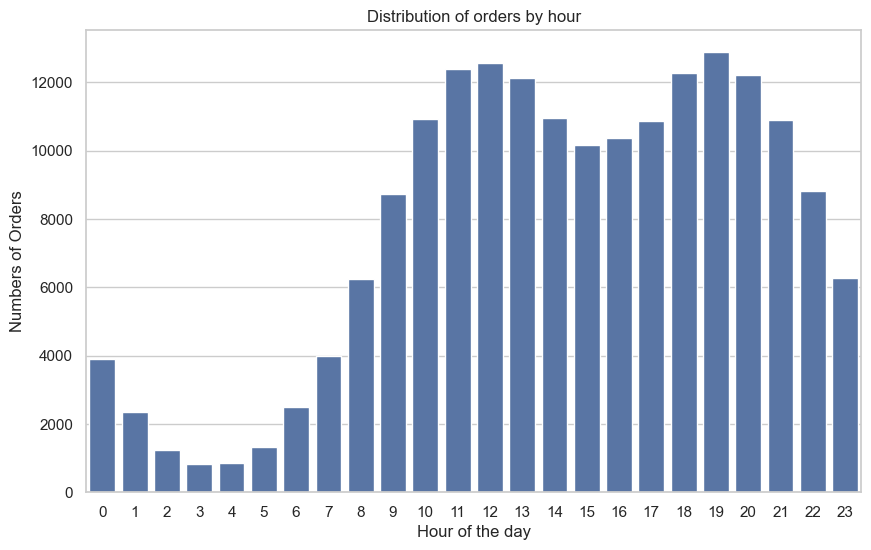

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_orders.index,y=0,data=hourly_orders)
plt.xlabel('Hour of the day')
plt.ylabel('Numbers of Orders')
plt.title('Distribution of orders by hour')
plt.xticks(range(24))

plt.show()

which product was sold the least as per your categories and what might be the reason behind that

In [76]:
df['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [75]:
df.groupby('Category')[['Product']].value_counts().sort_values().head(1)

Category  Product 
Other     LG Dryer    646
Name: count, dtype: int64

Which Product is most Likely to be sold during the winter seasons,summer seasob and rainy seoson? explain the possible reason behind the high volume sales

In [77]:
def season(month):
    if month>2 and month<6:
        return 'spring'
    elif month>5 and month<9:
        return 'Summer'
    elif month>8 and month<12:
        return 'Rainy'
    else:
        return 'winter'

In [78]:
df.head(0)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category,Order_Month,Sales,Order Hour


In [80]:
df['Season'] = df['Order_Month'].apply(season)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category,Order_Month,Sales,Order Hour,Season
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,75001,Dallas,Accessories,4,23.90,8,spring
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,02215,Boston,Phones,4,99.99,22,spring


In [92]:
top_season_product = (df.groupby(['Season','Product'])['Sales'].sum()
                      .reset_index()
                      .sort_values(['Season','Sales'],ascending=[True,False])
                      .groupby('Season')
                    .first()
                    .reset_index()
                      )
top_season_product

,Season,Product,Sales
0,Rainy,Macbook Pro Laptop,2128400.0
1,Summer,Macbook Pro Laptop,1737400.0
2,spring,Macbook Pro Laptop,2204900.0
3,winter,Macbook Pro Laptop,1961800.0


C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\730046192.py:21: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\730046192.py:21: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


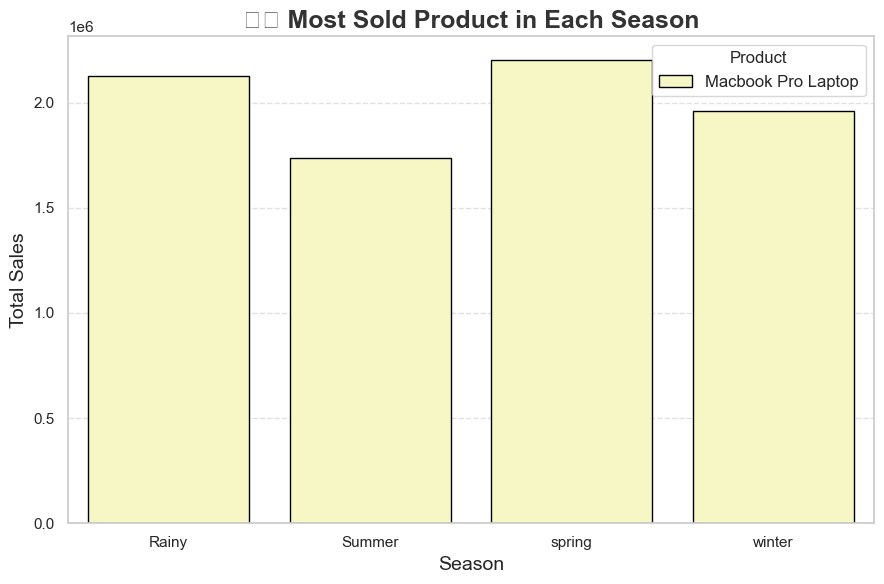

In [ ]:
# Plot
plt.figure(figsize=(9,6))
sns.set_theme(style="whitegrid")

sns.barplot(
    data=top_season_product,
    x='Season',
    y='Sales',
    hue='Product',
    palette='Spectral',
    dodge=False,
    edgecolor='black'
)

# Title and labels
plt.title('Most Sold Product in Each Season', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Product', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\600729757.py:28: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Local\Temp\ipykernel_9264\600729757.py:28: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sagar Meravi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


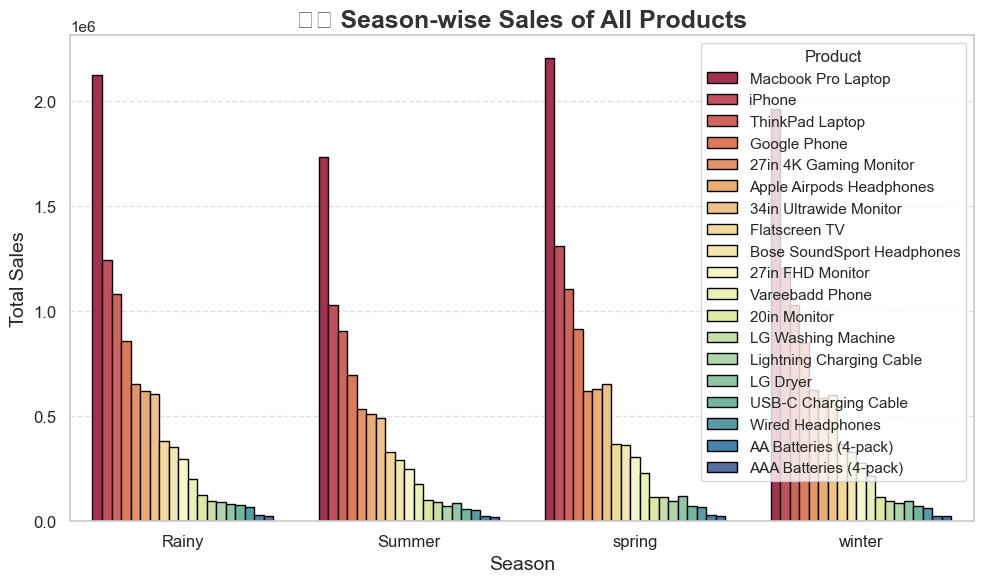

In [ ]:
season_product = (
    df.groupby(['Season', 'Product'])['Sales']
      .sum()
      .reset_index()
      .sort_values(['Season', 'Sales'], ascending=[True, False])
)

# Plot
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

sns.barplot(
    data=season_product,
    x='Season',
    y='Sales',
    hue='Product',
    palette='Spectral',
    edgecolor='black'
)

plt.title(' Season-wise Sales of All Products', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Product', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Which phone was most sold during month of march?

In [95]:
df.head(0)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category,Order_Month,Sales,Order Hour,Season


In [ ]:
march_df = df[df['Order_Month'] == 3]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,time,Pin Codes,City,Category,Order_Month,Sales,Order Hour,Season
55543,150533,AAA Batteries (4-pack),1,2.99,2019-03-01 03:06:00,"270 Dogwood St, San Francisco, CA 94016",2019,3,1,03:06:00,94016,San Francisco,Accessories,3,2.99,3,spring
55551,150541,AAA Batteries (4-pack),1,2.99,2019-03-01 01:03:00,"683 Adams St, Portland, OR 97035",2019,3,1,01:03:00,97035,Portland,Accessories,3,2.99,1,spring
55834,150812,Wired Headphones,1,11.99,2019-03-01 02:18:00,"915 Maple St, San Francisco, CA 94016",2019,3,1,02:18:00,94016,San Francisco,Phones,3,11.99,2,spring
56817,151749,Bose SoundSport Headphones,1,99.99,2019-03-01 01:54:00,"993 Washington St, San Francisco, CA 94016",2019,3,1,01:54:00,94016,San Francisco,Phones,3,99.99,1,spring
57120,152036,ThinkPad Laptop,1,999.99,2019-03-01 05:56:00,"477 Washington St, San Francisco, CA 94016",2019,3,1,05:56:00,94016,San Francisco,Laptop,3,999.99,5,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120484,176554,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",2019,3,24,11:14:00,94016,San Francisco,Accessories,3,14.95,11,spring
120485,176555,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",2019,3,22,20:27:00,94016,San Francisco,Monitors,3,149.99,20,spring
120486,176556,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",2019,3,14,10:29:00,90001,Los Angeles,Accessories,3,8.97,10,spring
120487,176557,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",2019,3,30,12:32:00,94016,San Francisco,Phones,3,700.00,12,spring


In [105]:
march_df[march_df['Category']=='Phones']['Product'].value_counts().head(2)

Product
Wired Headphones            1512
Apple Airpods Headphones    1308
Name: count, dtype: int64